#                                         **INTRODUCTION**

This case study aims to model the probability of attrition of each employee from the HR Analytics Dataset, available on Kaggle. Its conclusions will allow the management to understand which factors urge the employees to leave the company and which changes should be made to avoid their departure.


The libraries used for this project include: pandas and numpy for data manipulation, matplotlib.pyplot and seaborn for plotting, spicy for preprocessing, and scikit-learn for Machine Learning.




## **Libraries**

This project uses a set of libraries for data manipulation, plotting and modelling.



In [62]:
## importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import datetime, timedelta
import math
import plotly.express as px

# **Data Loading**

In [63]:
hr=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/download/HR Analytics.csv')

In [ ]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## **Data Praparation**

In [64]:
hr.shape       # number Of rows and columns

(14999, 10)

The dataset consists in 14,999 rows and 10 columns

In [66]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
hr.isnull().sum()     # hecthe the null values in the dataframe

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [68]:
hr.describe()    ## Summarize numercial variables


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [69]:
hr['salary'].unique()       ## Lists values of categorical variables

array(['low', 'medium', 'high'], dtype=object)

In [70]:
hr['sales'].unique()        ## Lists values of categorica variables

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [71]:
hr=hr.rename(columns={'sales':'Department'}) ## rename the variable of sales as Department

### **Exploratory Data Analysis **
The first stage of this analysis is to describe the dataset, understand the meaning of each variable, detect possible patterns and perform the necessary adjustments to ensure that the data will be proceeded correctly during the Machine Learning process.




In [72]:
hr['left'].value_counts()     ## Count occurences of each values in left


0    11428
1     3571
Name: left, dtype: int64

Among the 14999 employees 23.8% left the company

In [73]:
hr.groupby('left').mean(numeric_only=True)   ## Count occurences of each values in left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company have:

a lower satisfaction level: 0.44 vs 0.67.


a higher average monthly working hours: 207 vs 199.

a lower work accident ratio: 0.05 vs 0.18.

a lower promotion rate: 0.01 vs 0.03.


### **Correlation Analasis**

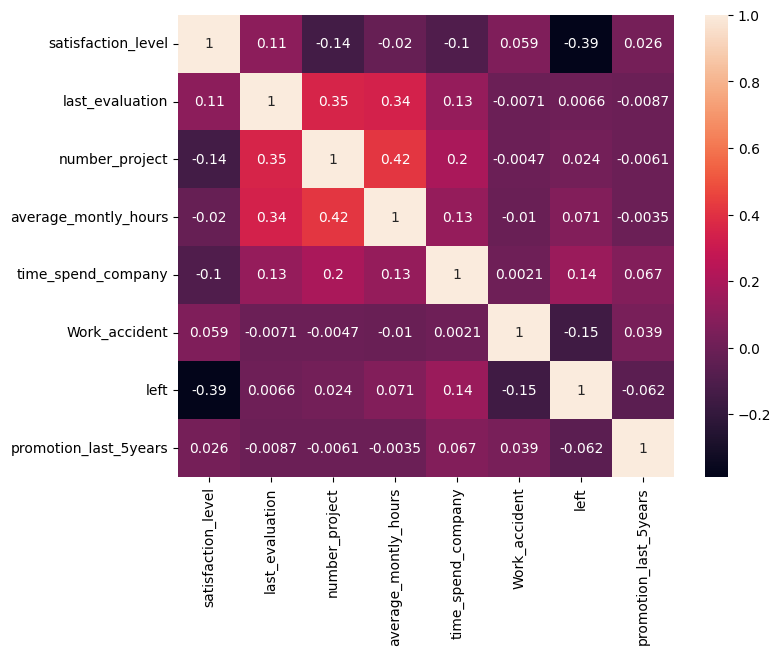

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(hr.corr(numeric_only=True), annot=True)
plt.show()


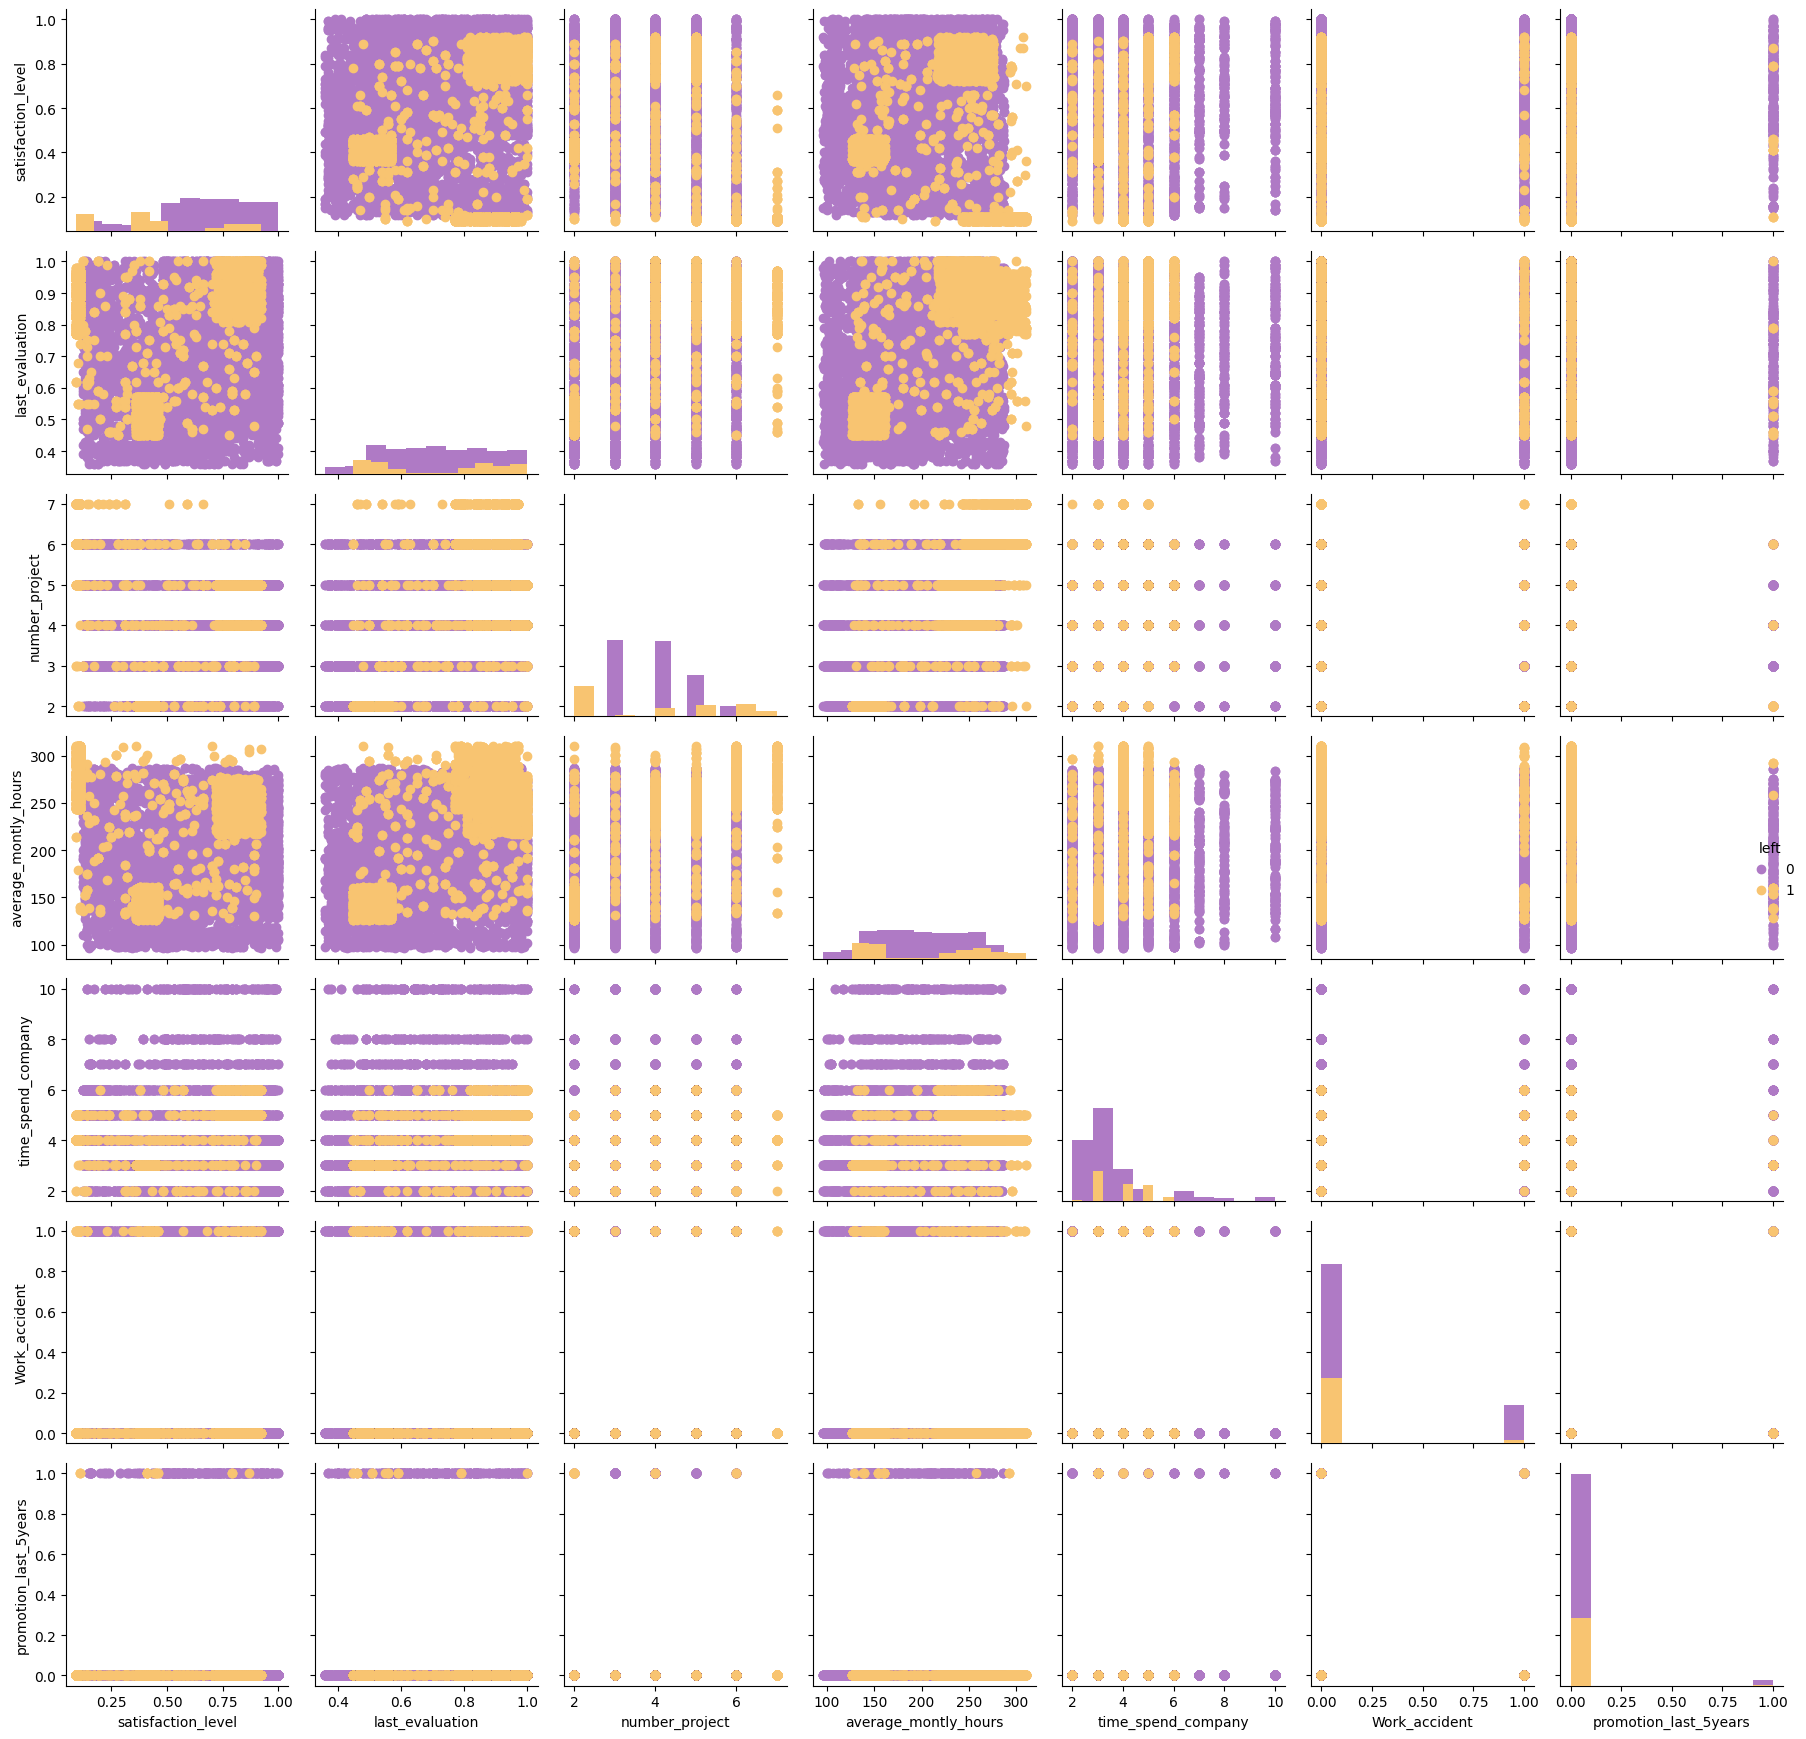

In [75]:
# Pair Plot
plot = sns.PairGrid(hr, hue='left', palette=('#AF7AC5', '#F8C471'))
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot.add_legend()
plt.tight_layout()


No strong correlation appears in the dataset. However:

number_project and average_monthly_hours have a moderate positive correlation (0.42).
left and satisfaction_level have a moderate negative correlation (-0.39).
last_evaluation and number_project have a moderate positive correlation (0.35).
last_evaluation and average_monthly_hours have a moderate positive correlation (0.34).


**Turnover by the salary levels**

In [77]:
hr.groupby(['salary','left'])['left'].count()


salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
Name: left, dtype: int64

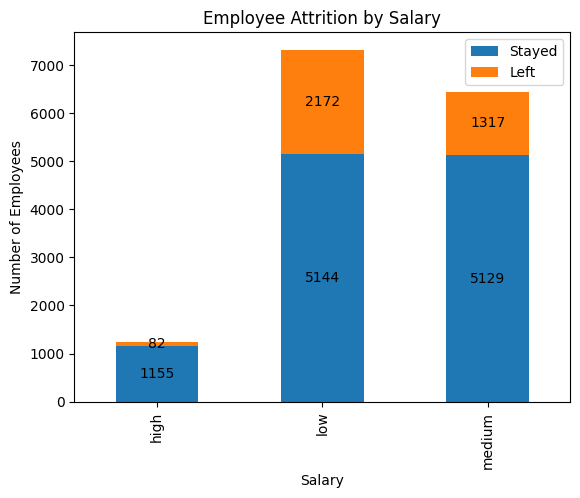

In [78]:

salary_left_count = hr.groupby(['salary', 'left'])['left'].count().unstack()

ax = salary_left_count.plot(kind='bar', stacked=True)

plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Employee Attrition by Salary')
plt.legend(['Stayed', 'Left'], loc='upper right')

for p in ax.containers:
    ax.bar_label(p, label_type='center')

plt.show()


In [79]:
import plotly.express as px

salary_left_count = hr.groupby(['salary', 'left'])['left'].count().reset_index(name='count')

fig = px.bar(salary_left_count, x='salary', y='count', color='left', barmode='group')

fig.update_layout(title='Employee Attrition by Salary',
                  xaxis_title='Salary',
                  yaxis_title='Number of Employees',
                  width=600,
                  height=400)

fig.show()


Departure by the Department

In [80]:
dept_proportion=hr['Department'].value_counts()/len(hr)*100          # Departments proportions
dept_proportion

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: Department, dtype: float64

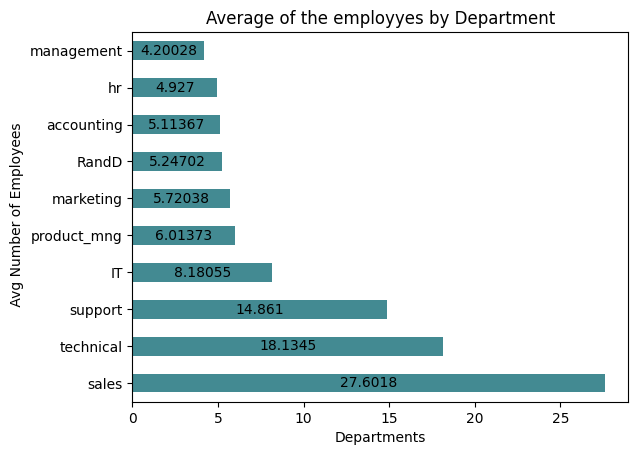

In [81]:
ax = dept_proportion.plot(kind='barh', stacked=True, color='#438a92')
plt.xlabel('Departments')
plt.ylabel(' Avg Number of Employees')
plt.title('Average of the employyes by Department')

for p in ax.containers:
    ax.bar_label(p, label_type='center')

plt.show()


In [82]:
hr.groupby(['Department'])['left'].mean()

Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

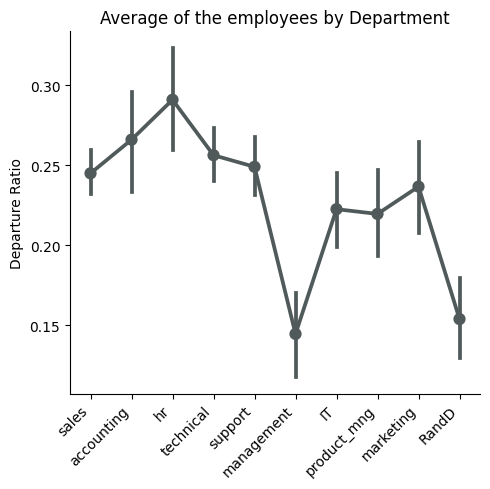

In [83]:
# assume hr is a pandas dataframe with a 'Department' column and a 'left' column

sns.catplot(x='Department', y='left', kind='point', color='#515A5A', data=hr)
plt.title('Average of the employees by Department')
plt.xlabel('')
plt.ylabel('Departure Ratio')
plt.xticks(rotation=45, ha='right')  # rotate the x labels by 45 degrees and align to the right
plt.tight_layout()
plt.show()


Some observations can be inferred:

Departure rate differs depending on the department, but no clear outlier is detected.
HR has the highest turnover rate.
R&D and Management have a significantly lower turnover rate.

In [84]:
hr.groupby(['left','Department'])['left'].count()

left  Department 
0     IT              954
      RandD           666
      accounting      563
      hr              524
      management      539
      marketing       655
      product_mng     704
      sales          3126
      support        1674
      technical      2023
1     IT              273
      RandD           121
      accounting      204
      hr              215
      management       91
      marketing       203
      product_mng     198
      sales          1014
      support         555
      technical       697
Name: left, dtype: int64

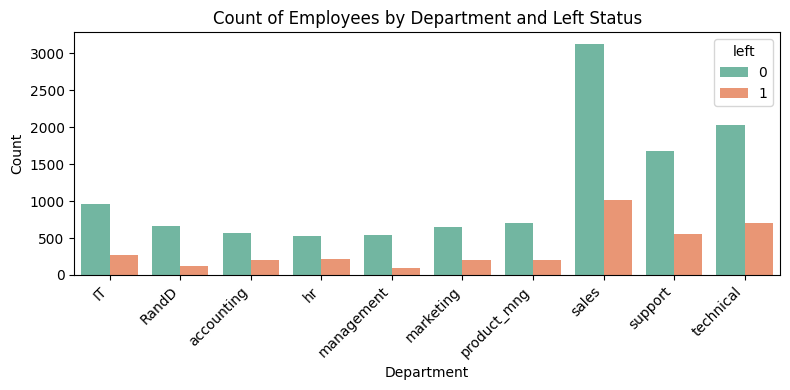

In [85]:

# assume hr is a pandas dataframe with 'left' and 'Department' columns

counts = hr.groupby(['left','Department'])['left'].count().reset_index(name='count')

plt.figure(figsize=(8,4))
sns.barplot(x='Department', y='count', hue='left', data=counts, palette='Set2')
plt.title('Count of Employees by Department and Left Status')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # rotate the x labels by 45 degrees and align to the right
plt.tight_layout()
plt.show()


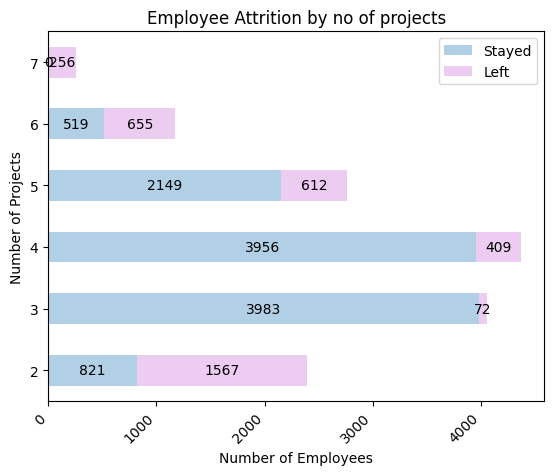

In [86]:
num_project_left = hr.groupby(['number_project', 'left'])['left'].count().unstack()
ax = num_project_left.plot(kind='barh', stacked=True, color=('#B1D0E6','#ECCCF0'))
plt.xlabel('Number of Employees')
plt.ylabel('Number of Projects')
plt.title('Employee Attrition by no of projects')
plt.legend(['Stayed', 'Left'], loc='upper right')
plt.xticks(rotation=45, ha='right')  # rotate the x labels by 45 degrees and align to the right
for p in ax.containers:
    ax.bar_label(p, label_type='center')

plt.show()


In [87]:
time_spend=hr.groupby(['time_spend_company','left'])['left'].count().unstack()

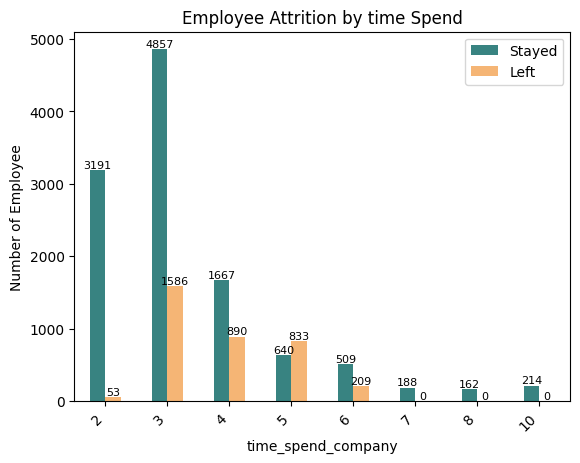

In [88]:
ax = time_spend.plot(kind='bar', stacked=False, color=('#388381','#F5B575'))
plt.xlabel('time_spend_company')
plt.ylabel('Number of Employee')
plt.title('Employee Attrition by time Spend')
plt.legend(['Stayed', 'Left'], loc='upper right')
plt.xticks(rotation=45, ha='right')  # rotate the x labels by 45 degrees and align to the right
for p in ax.containers:
    ax.bar_label(p, label_type='edge',size=8)

plt.show()


In [89]:
promotion_left=hr.groupby(['promotion_last_5years','left'])['left'].count()
promotion_left

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: left, dtype: int64

In [ ]:
# assume hr is a pandas dataframe with 'left' and 'Department' columns
plt.figure (figsize=(8,4))
sns.barplot(x='promotion_last_5years',y='count', hue='left', data=promotion_left, palette='Set2')
plt.title('Count of Employees by promotion_last_5years and Left Status')
plt.xlabel('promotion_last_5years')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # rotate the x labels by 45 degrees and align to the right
plt.tight_layout()
plt.show()


In [91]:
import plotly.graph_objects as go

# create the bar trace with left values as text labels
bar = go.Bar(x=hr.average_montly_hours,
             y=hr.number_project,
             marker_color=['steelblue', 'crimson'],
             text=hr.left,
             textposition='auto')

# create the layout object
layout = go.Layout(title='Bar Plot with Left Values',
                   xaxis_title='Average Monthly Hours',
                   yaxis_title='Number of Projects')

# create the figure object and add the trace and layout objects
fig = go.Figure(data=[bar], layout=layout)

# show the plot
fig.show()


**Encoding Categorical Variables**


The variable salary will be encoded using ordinal encoding and department will be encoded using one-hot encoding.



In [92]:
hr_df=hr.copy()
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [93]:
# Ordinal encoding for 
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
hr_df[["Department","salary"]] = Or_enc.fit_transform(hr_df[["Department","salary"]])



In [94]:
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,1,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,1,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,1,0,8.0,1.0


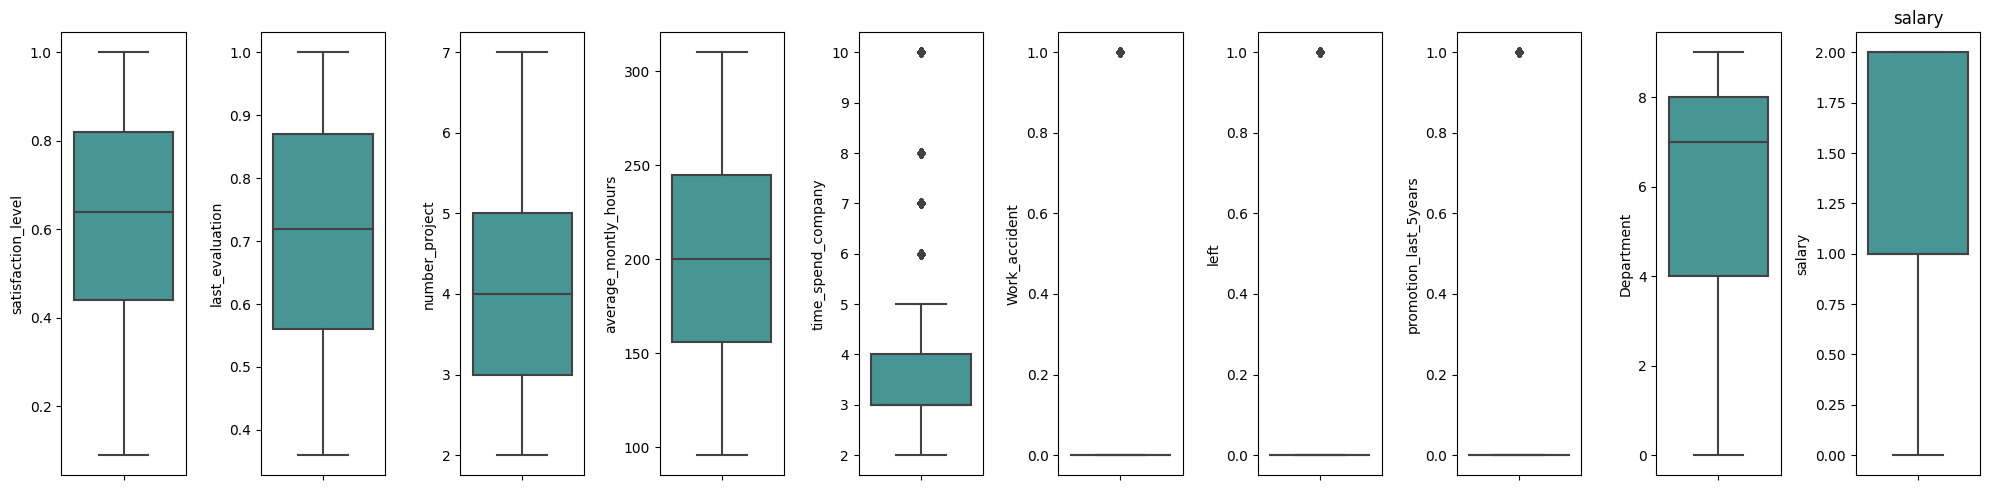

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the relevant columns from the HR DataFrame
cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
        'time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']
data = hr_df[cols]
# Create a boxplot for each column
fig, ax = plt.subplots(1, len(cols), figsize=(20,5))
for i, col in enumerate(cols):
    sns.boxplot(y=data[col], ax=ax[i], color='#3AA2A1')
    ax[i].set_ylabel(col)
plt.title(col)
plt.tight_layout()
plt.show()


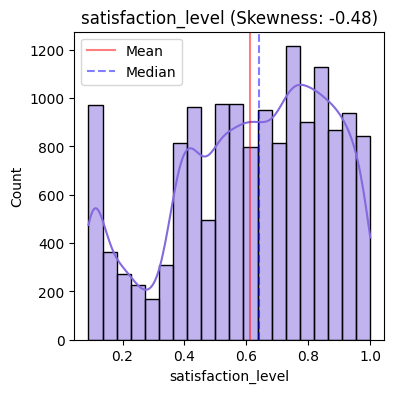

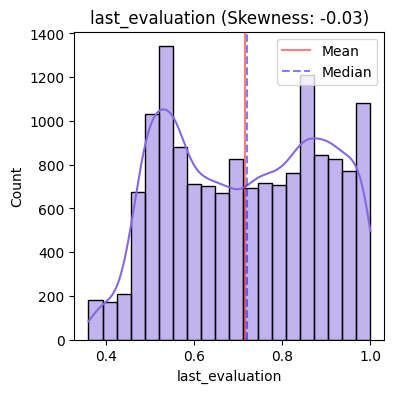

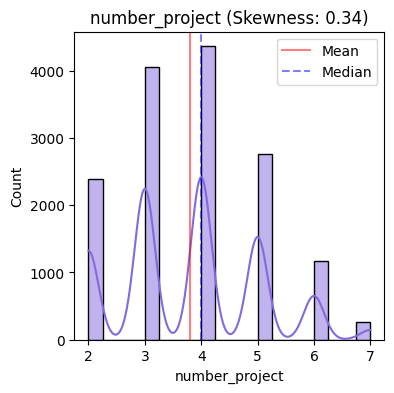

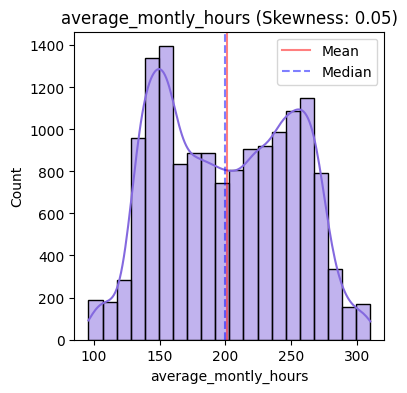

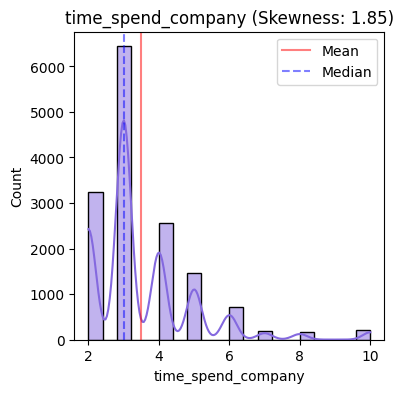

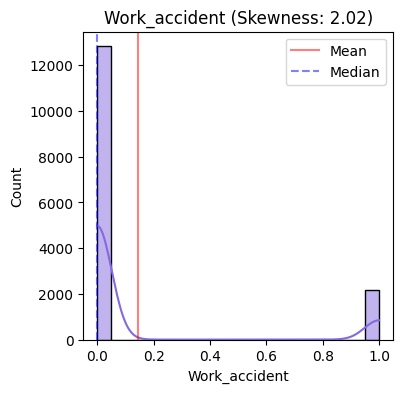

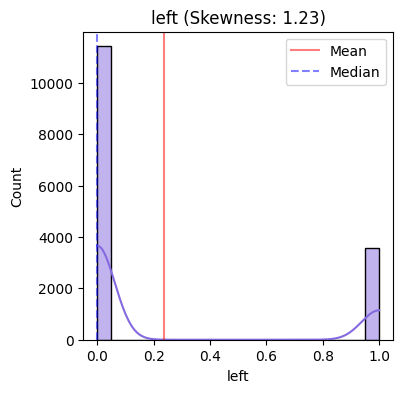

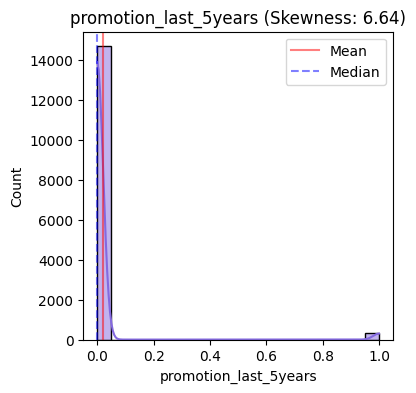

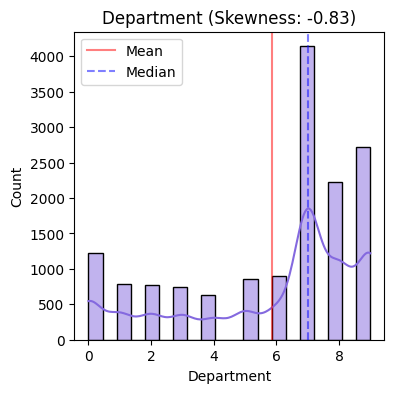

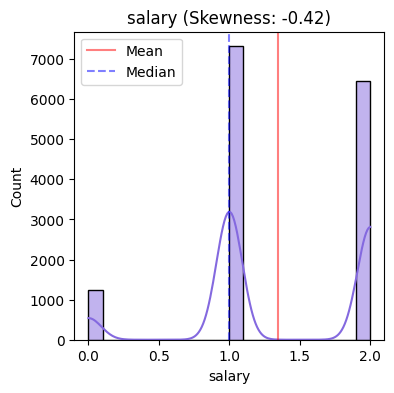

In [97]:
from scipy.stats import skew
# Loop through each column in the dataframe
for col in hr_df.columns:
    # Check if the column contains numeric data
    if hr_df[col].dtype in ['float64', 'int64']:
        # Calculate the skewness of the column
        col_skew = skew(hr_df[col])
        # Create a histogram plot for the column
        fig = plt.figure(figsize=(4, 4))
        sns.histplot(data=hr_df[col], color='#8469DF', bins=20,kde='True')
        plt.axvline(x=hr_df[col].mean(), color='red', alpha=0.5, label='Mean')
        plt.axvline(x=hr_df[col].median(), c='blue', ls='--', alpha=0.5, label='Median')
        plt.title(f"{col} (Skewness: {col_skew:.2f})")
        plt.legend()
        plt.show()


In [98]:
hr_skew=hr_df.copy()
hr_skew

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,1,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,1,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,1,0,8.0,1.0


In [99]:
#create log-transformed data
hr_skew['Work_accident_log'] = np.log(hr_skew['Work_accident'])
hr_skew['promotion_last_5years_log'] = np.log(hr_skew['promotion_last_5years'])
hr_skew['Department_log'] = np.log(hr_skew['Department'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



<Axes: xlabel='Work_accident_log', ylabel='Count'>

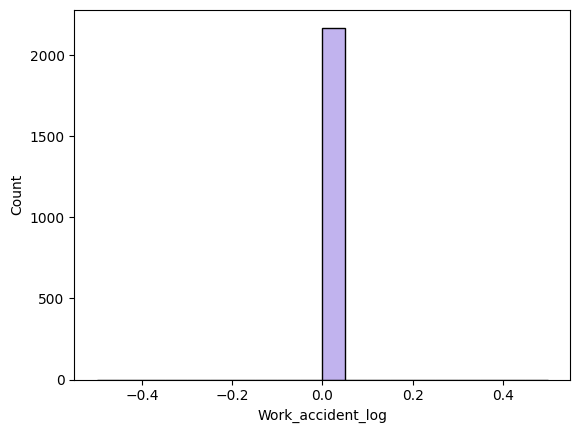

In [ ]:
sns.histplot(data=hr_skew['Work_accident_log'], color='#8469DF', bins=20,kde='True')

<Axes: xlabel='promotion_last_5years_log', ylabel='Count'>

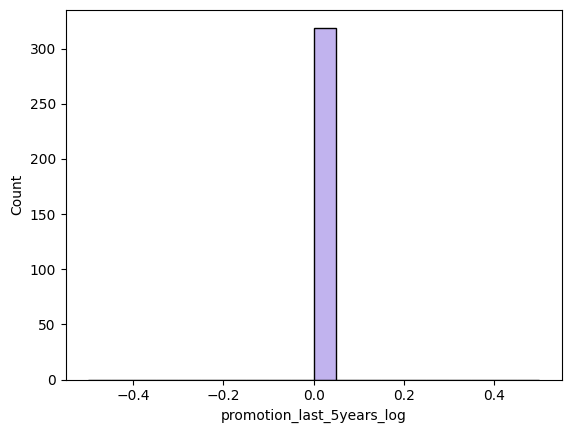

In [ ]:
sns.histplot(data=hr_skew['promotion_last_5years_log'], color='#8469DF', bins=20,kde='True')

<Axes: xlabel='Department_log', ylabel='Count'>

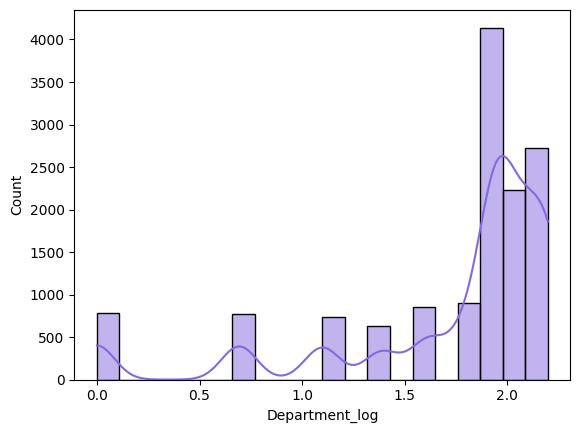

In [ ]:
sns.histplot(data=hr_skew['Department_log'], color='#8469DF', bins=20,kde='True')

In [ ]:
hr_skew=hr_skew.drop(['Work_accident_log','promotion_last_5years_log','Department_log'], axis=1)

In [ ]:
hr_skew

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,1,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,1,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,1,0,8.0,1.0


In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X_vif = hr_df.drop(['left'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

                 feature        VIF
0     satisfaction_level   6.466087
1        last_evaluation  20.621566
2         number_project  13.901185
3   average_montly_hours  19.507480
4     time_spend_company   6.639859
5          Work_accident   1.172840
6  promotion_last_5years   1.030144
7             Department   4.709552
8                 salary   5.092658


Here Satisfaction_level,last_evalution,number of project, average monthly hours,and time speandcompany are highly correlated

In [ ]:
X_vif = hr_skew.drop(['left', 'last_evaluation', 'average_montly_hours', 'time_spend_company'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

                 feature       VIF
0     satisfaction_level  5.079697
1         number_project  6.163644
2          Work_accident  1.172191
3  promotion_last_5years  1.023908
4             Department  4.435037
5                 salary  4.748912


In [ ]:
hr_skew

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0,1.0
14995,0.37,0.48,2,160,3,0,1,0,8.0,1.0
14996,0.37,0.53,2,143,3,0,1,0,8.0,1.0
14997,0.11,0.96,6,280,4,0,1,0,8.0,1.0


### Feature selection using selectK best method

In [ ]:
X = hr_skew.drop('left', axis=1)
Y = hr_skew['left']

In [ ]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                   Specs       Score
3   average_montly_hours  945.588933
5          Work_accident  306.737710
0     satisfaction_level  228.193183
4     time_spend_company  191.708547
6  promotion_last_5years   56.044865


In [ ]:
# Linear regression
X_lin = hr_skew.drop(['left', 'last_evaluation', 'number_project', 'Department','salary'], axis=1)
y_lin = hr_df['left']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Create a linear regression object
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2:.2f}')


R^2 score: 0.16


### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Split your data into training and testing sets.
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.25, random_state=101)

In [ ]:
#Create a Random Forest classifier object.
hr_random= RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
hr_random.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = hr_random.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 97.92%


In [ ]:
y_train_pred = hr_random.predict(X_train)                     
y_test_pred = hr_random.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy: {:.2f}%'.format(train_accuracy))
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Train Accuracy: 1.00%
Test Accuracy: 0.98%


### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Fit logistic regression model on the training set
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy on both training and testing sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Train accuracy: 0.7681473456121344
Test accuracy: 0.7536666666666667


In [ ]:
total_acc = (train_acc + test_acc) / 2
print("Total accuracy:", total_acc)


Total accuracy: 0.7609070061394005


### **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Fit a decision tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the target variable for the training and testing data
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Calculate the accuracy of the model on the training and testing data
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
total_accuracy = accuracy_score(y_lin, clf.predict(X_lin))

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Total accuracy:", total_accuracy)


Training accuracy: 0.9959163263605301
Testing accuracy: 0.971
Total accuracy: 0.99093272884859


This model will enable the business to determine the likelihood that a worker will leave and take necessary action to prevent departures. Employee happiness and the quantity of work they must handle appear to be significant factors in withdrawals. To lower the turnover rate, it would be especially important to pay attention to work-life balance.





###                  **Random forest Classifier **  
 Train Accuracy: 1.00%                                                       
                                                                             
                                                                              
Test Accuracy: 0.98%                    




### **Logistic Regression**

Train accuracy: 0.7681473456121344







Test accuracy: 0.7536666666666667

### **DecisionTreeClassifier**
Training accuracy: 0.9959163263605301











Testing accuracy: 0.971

## **Linear regression**
R^2 score: 0.16


The resulting accuracy is still really good, which confirms that the initial model didn't have bias due to the imbalance of the dataset.

The high accuracy is anyway driven by the binned features tailored to the dataset. If they work really well for this data, it might not be the case for another dataset. The features should instead be set using standard binning approach, which wouldn't fit as well the data but which would be adaptable to any dataset. That solution would be recommended if the model has to be run in production.

